In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.shape,test.shape

((79853, 12), (34224, 11))

# Univariate Analysis

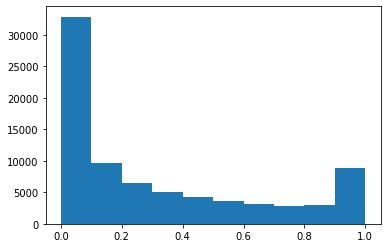

In [4]:
plt.hist(train['perc_premium_paid_by_cash_credit']);

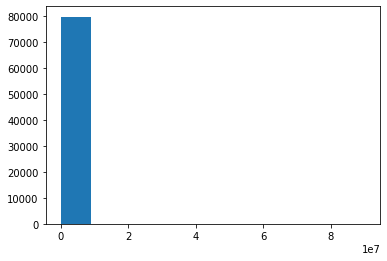

In [5]:
plt.hist(train['Income']);


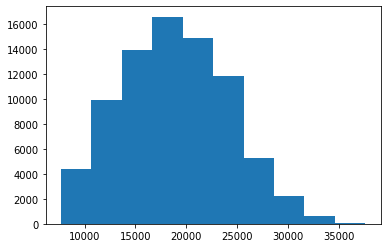

In [6]:
plt.hist(train['age_in_days']);


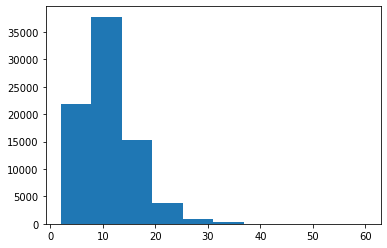

In [7]:
plt.hist(train['no_of_premiums_paid']);

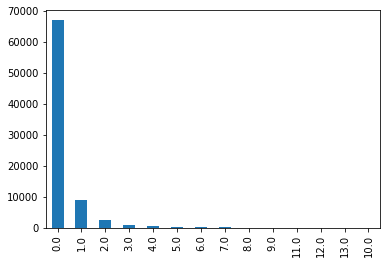

In [8]:
train['Count_3-6_months_late'].value_counts().plot.bar();


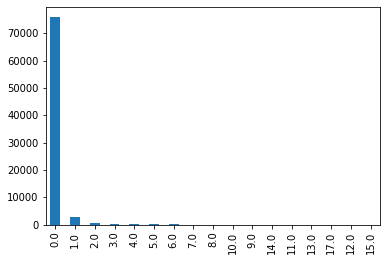

In [9]:
train['Count_6-12_months_late'].value_counts().plot.bar()


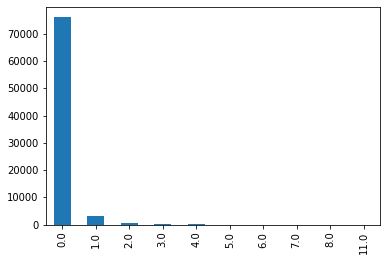

In [10]:
train['Count_more_than_12_months_late'].value_counts().plot.bar();


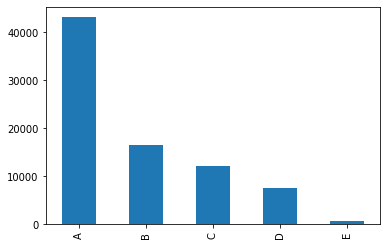

In [11]:
train['sourcing_channel'].value_counts().plot.bar();

# Bivariate Analysis

target               0      1
sourcing_channel             
A                 2349  40785
B                 1066  15446
C                  903  11136
D                  634   6925
E                   46    563


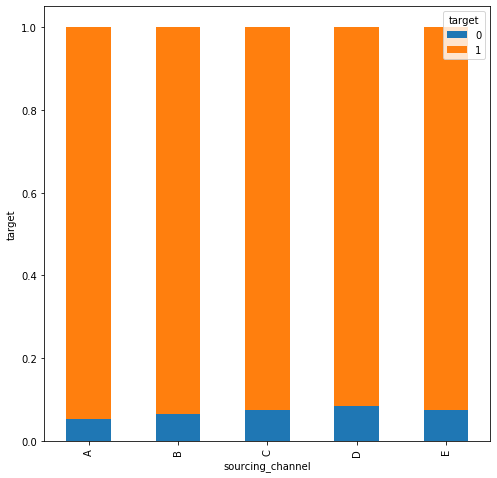

In [12]:
print(pd.crosstab(train['sourcing_channel'],train["target"]))
Dependents = pd.crosstab(train['sourcing_channel'],train["target"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.xlabel("sourcing_channel")
plt.ylabel("target")
plt.show()

target                    0      1
Count_3-6_months_late             
0.0                    2627  64174
1.0                    1153   7673
2.0                     592   1927
3.0                     288    666
4.0                     158    216
5.0                      67    101
6.0                      31     37
7.0                      10     13
8.0                       6      9
9.0                       2      2
10.0                      1      0
11.0                      1      0
12.0                      1      0
13.0                      1      0


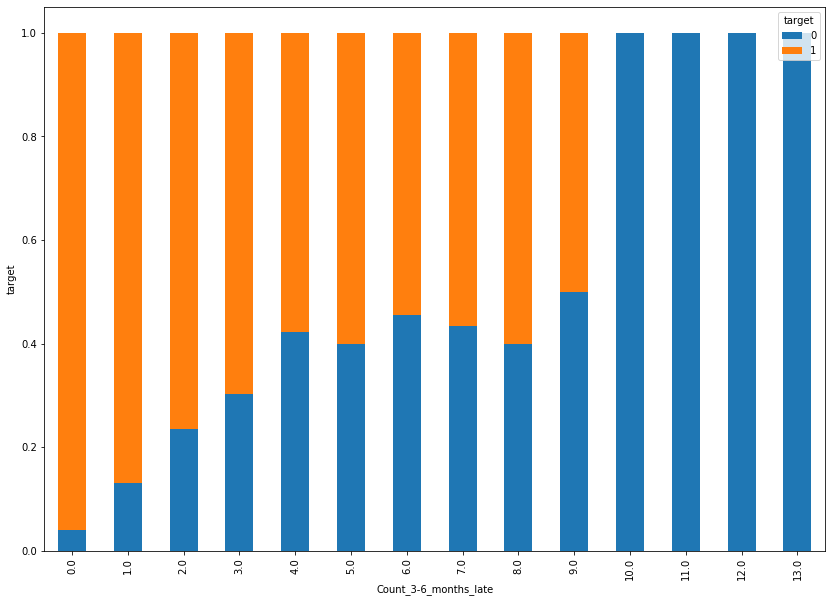

In [13]:
print(pd.crosstab(train['Count_3-6_months_late'],train["target"]))
Dependents = pd.crosstab(train['Count_3-6_months_late'],train["target"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(14,10))
plt.xlabel("Count_3-6_months_late")
plt.ylabel("target")
plt.show()

target                     0      1
Count_6-12_months_late             
0.0                     3445  72386
1.0                      828   1852
2.0                      334    359
3.0                      185    132
4.0                       85     45
5.0                       30     16
6.0                       13     13
7.0                        7      4
8.0                        3      2
9.0                        2      2
10.0                       1      3
11.0                       1      1
12.0                       1      0
13.0                       1      1
14.0                       1      1
15.0                       0      1
17.0                       1      0


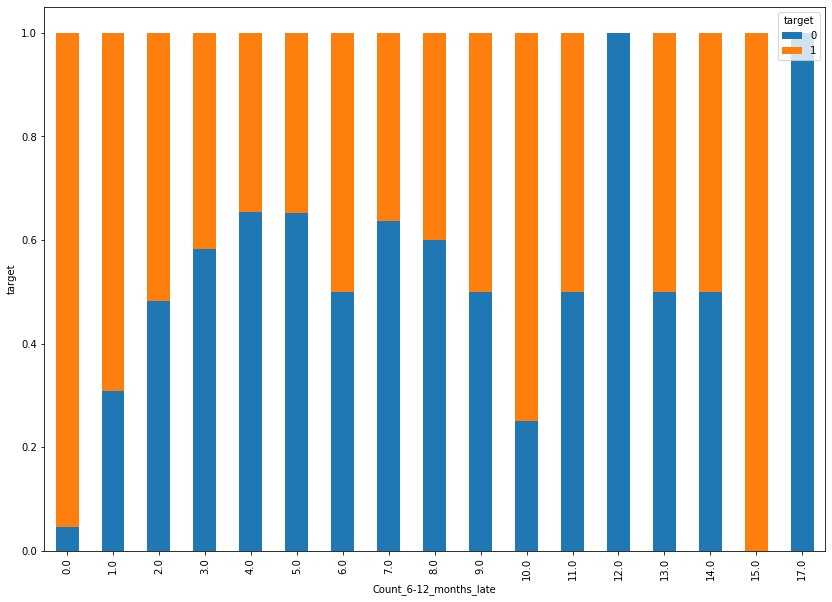

In [14]:
print(pd.crosstab(train['Count_6-12_months_late'],train["target"]))
Dependents = pd.crosstab(train['Count_6-12_months_late'],train["target"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(14,10))
plt.xlabel("Count_6-12_months_late")
plt.ylabel("target")
plt.show()

target                             0      1
Count_more_than_12_months_late             
0.0                             3750  72288
1.0                              835   2161
2.0                              228    270
3.0                               85     66
4.0                               25     23
5.0                                7      6
6.0                                4      2
7.0                                2      1
8.0                                1      1
11.0                               1      0


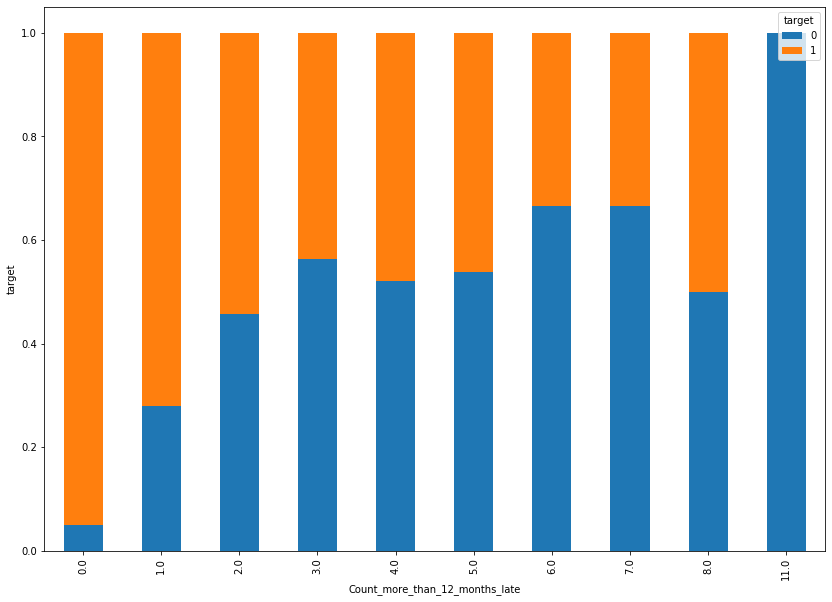

In [15]:
print(pd.crosstab(train['Count_more_than_12_months_late'],train["target"]))
Dependents = pd.crosstab(train['Count_more_than_12_months_late'],train["target"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(14,10))
plt.xlabel("Count_more_than_12_months_late")
plt.ylabel("target")
plt.show()

target                  0      1
residence_area_type             
Rural                1998  29672
Urban                3000  45183


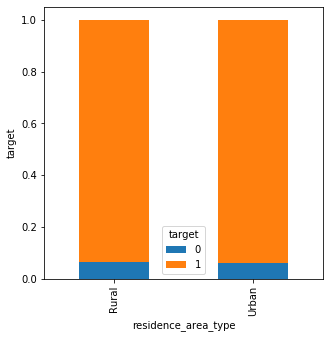

In [16]:
print(pd.crosstab(train['residence_area_type'],train["target"]))
Dependents = pd.crosstab(train['residence_area_type'],train["target"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("residence_area_type")
plt.ylabel("target")
plt.show()

After that we can conclude that sourcing channel type and and residence area does'nt effect target variablea at all

# Data Transformation


In [17]:
target = train.pop('target')
train_id = train.pop('id')
test_id = test.pop('id')

In [18]:
len_train = len(train)

In [19]:
merged = pd.concat([train, test])

In [20]:
merged.drop(['residence_area_type','sourcing_channel'],axis=1,inplace=True)

In [21]:
merged.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7
3,0.049,15341,250510,0.0,0.0,0.0,99.57,9
4,0.052,31400,198680,0.0,0.0,0.0,99.87,12


In [22]:
merged['Count_3-6_months_late'].fillna(merged['Count_3-6_months_late'].mode()[0],inplace=True)
merged['Count_6-12_months_late'].fillna(merged['Count_6-12_months_late'].mode()[0],inplace=True)
merged['Count_more_than_12_months_late'].fillna(merged['Count_more_than_12_months_late'].mode()[0],inplace=True)
merged['application_underwriting_score'].fillna(merged['application_underwriting_score'].mean(),inplace=True)

In [23]:
original_features =['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid']

In [24]:
merged['Income']=np.log(merged['Income'])
merged['no_of_premiums_paid']=np.log(merged['no_of_premiums_paid'])
merged['application_underwriting_score']=np.log(merged['application_underwriting_score'])

Let's make some more features to increase the strength of model

In [25]:
for col in original_features:
    # Normalize the data, so that it can be used in norm.cdf(), which makes model more powerful
    # as though it is a standard normal variable
    merged[col] = ((merged[col] - merged[col].mean()) 
    / merged[col].std()).astype('float32')

    # Square
    merged[col+'^2'] = merged[col] * merged[col]

    # Cube
    merged[col+'^3'] = merged[col] * merged[col] * merged[col]

    # 4th power
    merged[col+'^4'] = merged[col] * merged[col] * merged[col] * merged[col]

    # Cumulative normal percentile
    merged[col+'_cnp'] = norm.cdf(merged[col]).astype('float32')


In [26]:
new_features = set(merged.columns) - set(original_features)

In [27]:
for col in new_features:
    merged[col] = ((merged[col] - merged[col].mean()) 
    / merged[col].std()).astype('float32')

In [28]:
merged.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,perc_premium_paid_by_cash_credit^2,perc_premium_paid_by_cash_credit^3,...,Count_more_than_12_months_late^4,Count_more_than_12_months_late_cnp,application_underwriting_score^2,application_underwriting_score^3,application_underwriting_score^4,application_underwriting_score_cnp,no_of_premiums_paid^2,no_of_premiums_paid^3,no_of_premiums_paid^4,no_of_premiums_paid_cnp
0,0.342624,-1.299205,1.184663,-0.355901,-0.178501,-0.191295,-0.058533,0.594541,-0.749849,-0.316104,...,-0.018131,-0.223521,-0.239918,0.092872,-0.070642,-0.230656,-0.416810,0.141520,-0.271066,0.753348
1,-0.909406,0.518392,1.003442,-0.355901,-0.178501,-0.191295,1.121581,1.570480,-0.146923,-0.610070,...,-0.018131,-0.223521,0.062114,0.138466,-0.064516,1.381102,0.945668,0.961071,0.221437,1.521414
2,1.800835,-0.250753,-1.003587,2.544524,6.612145,3.030668,-0.508877,-0.665215,1.905790,1.835778,...,-0.002635,4.541094,-0.178398,0.088621,-0.070383,-0.934172,-0.359399,0.028648,-0.265208,-0.906566
3,-0.792868,-0.670287,0.654567,-0.355901,-0.178501,-0.191295,0.688715,-0.153786,-0.315473,-0.515954,...,-0.018131,-0.223521,-0.126546,0.103434,-0.069771,0.910780,-0.629492,0.093690,-0.281348,-0.251251
4,-0.783904,2.406104,0.302266,-0.355901,-0.178501,-0.191295,1.094567,0.431652,-0.327482,-0.509752,...,-0.018131,-0.223521,0.047701,0.135251,-0.065086,1.357139,-0.524596,0.112497,-0.278525,0.552729


In [29]:
train=merged[:len_train]
test=merged[len_train:]
train.shape,test.shape

((79853, 40), (34224, 40))

# Building Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
x1,x2,y1,y2=train_test_split(train,target,test_size=0.2,random_state=10,stratify=target)

In [32]:
logi=LogisticRegression(class_weight='balanced').fit(x1,y1)
pred1=logi.predict_proba(x1)
pred1 = pred1[:, 1]
pred2=logi.predict_proba(x2)
pred2 = pred2[:, 1]
print("Train:",roc_auc_score(y1,pred1))
print("Validation",roc_auc_score(y2,pred2))
p=logi.predict(x2)
cm=confusion_matrix(y2,p)
print(cm)
print(accuracy_score(y2,p))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train: 0.8442449716609023
Validation 0.8278442989780241
[[  704   296]
 [ 3043 11928]]
0.7909335670903512


In [34]:
final_output=logi.predict_proba(test)
final_output=final_output[:,1]
submit=pd.DataFrame({'id':test_id,'target':final_output})

In [35]:
submit.to_csv('submit21.csv',index=False)